In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import basis_kernels

In [5]:
def generate_and_subsample(M):
    size = 5
    def radial(r):
        return 1
    
    basis = basis_kernels.cube_basis_kernels(size * M, radial, 
                                             basis_kernels.vector_repr, 
                                             basis_kernels.vector_repr)
    return basis_kernels.gaussian_subsampling(basis, (1, 1, 1, M, M, M))

In [20]:
hires = generate_and_subsample(31)

In [23]:
Ms = range(1, 21, 2)
error = []

for M in Ms:
    basis = generate_and_subsample(M)
    error.append(np.linalg.norm(basis - hires) / np.linalg.norm(hires))

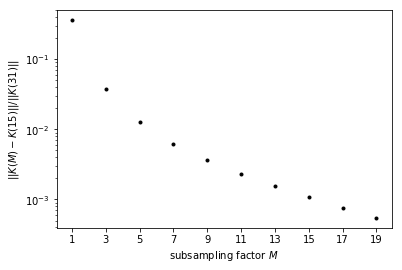

In [28]:
plt.semilogy(Ms, error, 'k.')
plt.ylabel("$|| K(M) - K(15) || / ||K(31)||$")
plt.xlabel("subsampling factor $M$")
plt.xticks(Ms);